In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Importing Train data
data_train = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\datascience\Logistic Regression\Titanic_train.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.shape

(891, 12)

In [5]:
# Importing test data
data_test = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\datascience\Logistic Regression\Titanic_test.csv")

In [6]:
data_test.shape

(418, 11)

In [7]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
## Information on data set columns
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower
# sibsp: The dataset defines family relations in this way…
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)
# parch: The dataset defines family relations in this way…
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [9]:
# the target variable “Survived” is missing in the test data set. All other columns appears in both dataframs.
# In sum we have 11 different variables which can be used as features to predict the outcome of our target.

In [10]:
print("Missing in the train data :")
display(data_train.isnull().sum())

Missing in the train data :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print("Missing in the test data :")
display(data_test.isnull().sum())

Missing in the test data :


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# Exploring and Cleaning train Data
data_train.head()
# Removing column PassengerId as it is not relevant data or required data column. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data_train = data_train.drop('PassengerId', axis = 1)

In [14]:
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
#checking for duplicated rows
data_train[data_train.duplicated(keep=False)]
# No duplicated row found

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
# Checking for blank values
data_train[data_train.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [17]:
data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
# Finding values for age column
data_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
data_train['Age']=data_train['Age'].fillna(28)

In [20]:
data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
# Finding values for Embarked column
data_train['Embarked'].value_counts()



Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
#Finding mode for Embarked column
data_train['Embarked'].mode()[0]

'S'

In [23]:
data_train['Embarked']=data_train['Embarked'].fillna(data_train["Embarked"].mode()[0])

In [24]:
# Checking for missing values
data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [25]:
# treating missing value for Cabin column
#There are a lot of missing values but we should use the cabin variable because it can be an important predictor.
# Upon researching about the titanic dataset found that a deck column is missing which is required to replace cabin .
# For now I will simply drop the column Cabin and poceed with remaining data columns

In [26]:
data_train = data_train.drop('Cabin',axis=1)

In [27]:
data_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [28]:
# All the empty values has been removed for Train data and Train data is cleaned now.
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
# Cleaning Test data
data_test.head()
# To match the column counts , I will remove passengerID and Cabin column from Test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
# Drop PassengerId column
data_test = data_test.drop('PassengerId',axis=1)

In [31]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
# Drop Cabin column
data_test = data_test.drop('Cabin',axis=1)

In [33]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [34]:
# checking for null values in test data
data_test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [35]:
# Replacing null value in age column
data_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [36]:
# Filling the null value with median
data_test['Age'] = data_test['Age'].fillna(27) 

In [37]:
# checking again for empty value
data_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [38]:
data_test[data_test.isnull().any(axis=1)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [39]:
# Mr. Thomas was in passenger class 3, travelled alone and embarked in Southhampton. 
# We will take other cases from people in this category and replace the missing Fare with the median of this group.
thomas_median = data_test.loc[(data_test['Pclass'] == 3) & (data_test['SibSp'] == 0) & (data_test['Embarked'] == 'S')]['Fare'].median()
print(thomas_median)
data_test.loc[data_test['Fare'].isnull(),'Fare'] = thomas_median

7.8958


In [40]:
# checking again for null value
data_test.isnull().sum()
# No missing value is present in the data set

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [41]:
# Checking for outliers in the Train Data set
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Age'>

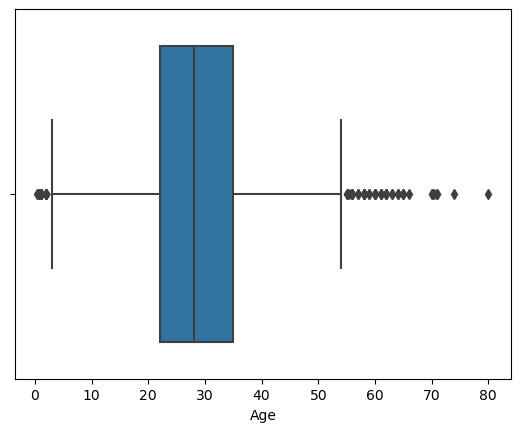

In [42]:
# Only age and Fare column can have outliers
# checking age column for outlier
sns.boxplot(x = data_train['Age'])

<Axes: xlabel='Age', ylabel='Count'>

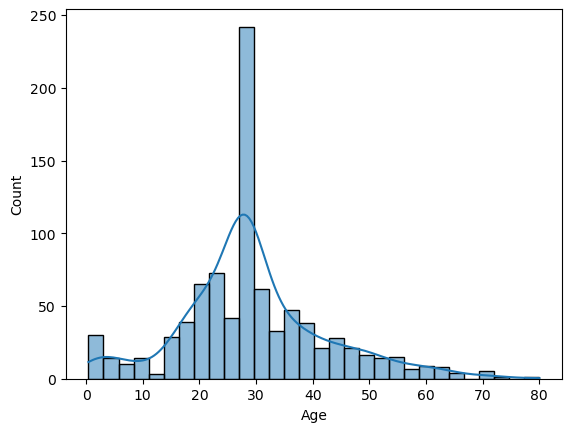

In [43]:
sns.histplot(data_train['Age'] , kde = True)

In [44]:
data_train['Age'].skew()

0.5102446555756495

In [45]:
data_train['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [46]:
print(f"Max value of age column : {data_train['Age'].max()}")
print(f"Min value of age column : {data_train['Age'].min()}")


Max value of age column : 80.0
Min value of age column : 0.42


In [47]:
# We can categorize age column with values between 0 and 80.
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_train['Age'] = pd.cut(data_train['Age'], bins = bins, labels=labels)

In [48]:
pd.DataFrame(data_train['Age'].value_counts())

,count
Age,
Adult,526
Young,188
Kid,69
Old,64
Infant,44


<Axes: xlabel='Age'>

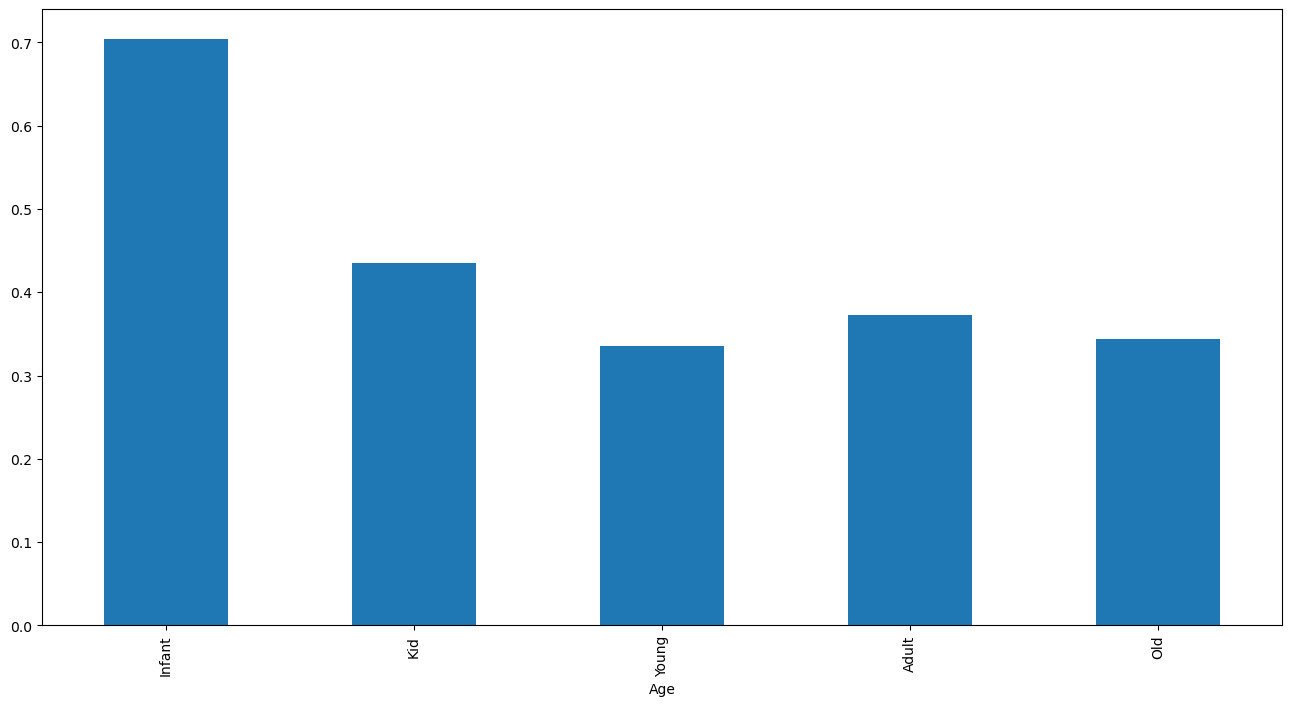

In [49]:
data_train[['Age','Survived']].groupby('Age')['Survived'].mean().plot(kind='bar',figsize=(16,8))
# Young people were probably rescued first and have a higher chance of survival.

In [50]:
# creating bins for Fare column ( Train)
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_train['Fare'] = pd.cut(data_train["Fare"], bins = bins, labels = labels)

<Axes: xlabel='Fare'>

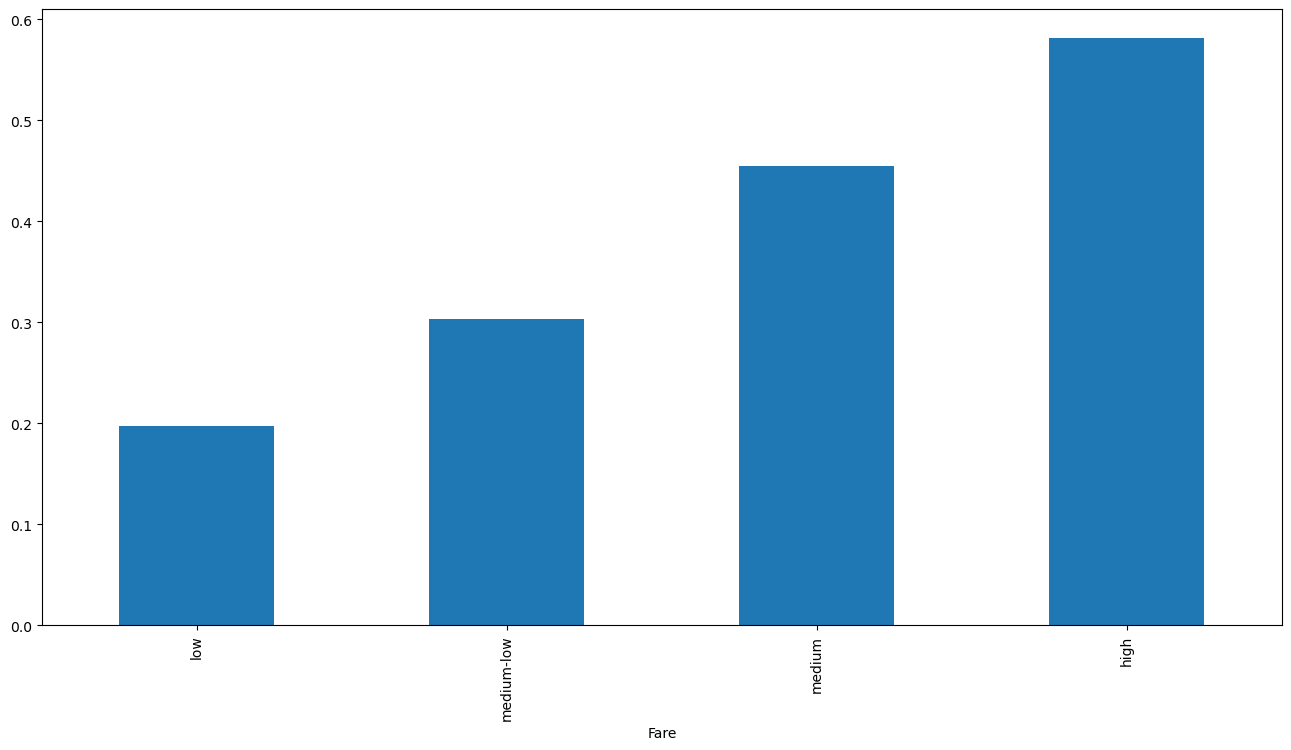

In [51]:
data_train[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar',figsize=(16,8))
# We can conlude that , younger passengers have a higher chance of survival and so do people with higher ticket prices. 
# Young people were probably rescued first and the people with higher ticket prices had access to the lifeboats first.

In [52]:
data_train.head(10)
# Ticket and column is also irrelevant for us, so I will simply drop the Ticket and Name column.


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,low,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,high,C
2,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,medium-low,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,high,S
4,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,medium-low,S
5,0,3,"Moran, Mr. James",male,Adult,0,0,330877,medium-low,Q
6,0,1,"McCarthy, Mr. Timothy J",male,Old,0,0,17463,high,S
7,0,3,"Palsson, Master. Gosta Leonard",male,Infant,3,1,349909,medium,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Adult,0,2,347742,medium-low,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Kid,1,0,237736,medium,C


In [53]:
data_train = data_train.drop('Name',axis=1)

In [54]:
data_train = data_train.drop('Ticket',axis=1)

In [55]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Young,1,0,low,S
1,1,1,female,Adult,1,0,high,C
2,1,3,female,Adult,0,0,medium-low,S
3,1,1,female,Adult,1,0,high,S
4,0,3,male,Adult,0,0,medium-low,S


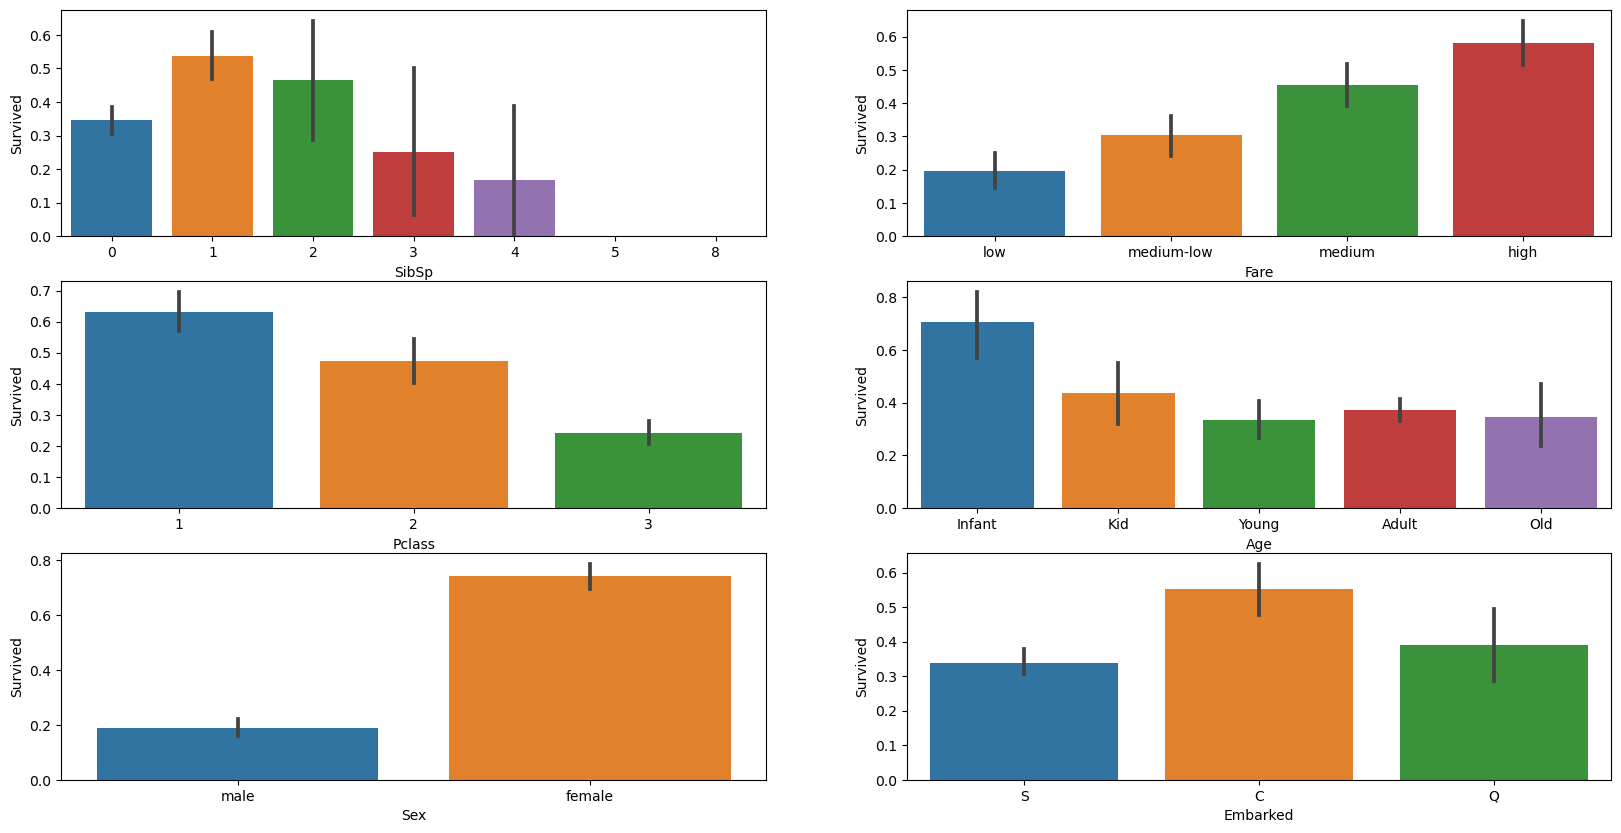

In [56]:
# Plot for Survived against each column.
plt.figure(figsize=(20, 10))
plt.subplot(3,2,1)
sns.barplot(x = 'SibSp', y = 'Survived', data = data_train)
plt.subplot(3,2,2)
sns.barplot(x = 'Fare', y = 'Survived', data = data_train)
plt.subplot(3,2,3)
sns.barplot(x = 'Pclass', y = 'Survived', data = data_train)
plt.subplot(3,2,4)
sns.barplot(x = 'Age', y = 'Survived', data = data_train)
plt.subplot(3,2,5)
sns.barplot(x = 'Sex', y = 'Survived', data = data_train)
plt.subplot(3,2,6)
sns.barplot(x = 'Embarked', y = 'Survived', data = data_train);

In [57]:
# machine learning models hates non-numeric values. We cannot put them to our train and test data.
# We need to convert them into numeric values. We have two options for that; Label Encoder, and Pandas get_dummies method.I am going to use get_dummies.
dummies = ['Fare', 'Age', 'Embarked', 'Sex']
dummy_data_train = pd.get_dummies(data_train[dummies])

In [58]:
dummy_data_train.shape

(891, 14)

In [59]:
# We will concat the two data frames, and drop the old columns.
data_train1 = pd.concat([data_train, dummy_data_train], axis = 1)
data_train1.drop(dummies, axis=1, inplace=True)

In [60]:
data_train1.head()
# Our training data is ready .

,Survived,Pclass,SibSp,Parch,Fare_low,Fare_medium-low,Fare_medium,Fare_high,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,1,0,True,False,False,False,False,False,True,False,False,False,False,True,False,True
1,1,1,1,0,False,False,False,True,False,False,False,True,False,True,False,False,True,False
2,1,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,True,False
3,1,1,1,0,False,False,False,True,False,False,False,True,False,False,False,True,True,False
4,0,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True


In [61]:
# Now we will prepare our test data
data_test.head()
# We will drop Name and Ticket column from test data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [62]:
# dropping Name column
data_test = data_test.drop('Name',axis=1)

In [63]:
# dropping Ticket column
data_test = data_test.drop('Ticket',axis=1)

In [64]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [65]:
#checking for Null values in the test data
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [66]:
# Binning for test data for categorical column
# creating Bins for Sex column

print(f"Max value of age column : {data_test['Age'].max()}")
print(f"Min value of age column : {data_test['Age'].min()}")

Max value of age column : 76.0
Min value of age column : 0.17


In [67]:
# We can categorize age column with values between 0 and 80.
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_test['Age'] = pd.cut(data_test['Age'], bins = bins, labels=labels)

In [68]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,Adult,0,0,7.8292,Q
1,3,female,Adult,1,0,7.0000,S
2,2,male,Old,0,0,9.6875,Q
3,3,male,Adult,0,0,8.6625,S
4,3,female,Young,1,1,12.2875,S


In [69]:
# creating bins for Fare column ( Test)
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_test['Fare'] = pd.cut(data_test["Fare"], bins = bins, labels = labels)

In [70]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,Adult,0,0,low,Q
1,3,female,Adult,1,0,low,S
2,2,male,Old,0,0,medium-low,Q
3,3,male,Adult,0,0,medium-low,S
4,3,female,Young,1,1,medium-low,S


In [71]:
# Now we will create the Sex , Age , Fare and Embarked column to numeric value.
dummies = ['Fare', 'Age', 'Embarked', 'Sex']
dummy_data_test = pd.get_dummies(data_test[dummies])


In [72]:
# We will concat the two data frames, and drop the old columns.
data_test1 = pd.concat([data_test, dummy_data_test], axis = 1)
data_test1.drop(dummies, axis=1, inplace=True)

In [73]:
data_test1

,Pclass,SibSp,Parch,Fare_low,Fare_medium-low,Fare_medium,Fare_high,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,0,0,True,False,False,False,False,False,False,True,False,False,True,False,False,True
1,3,1,0,True,False,False,False,False,False,False,True,False,False,False,True,True,False
2,2,0,0,False,True,False,False,False,False,False,False,True,False,True,False,False,True
3,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True
4,3,1,1,False,True,False,False,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True
414,1,0,0,False,False,False,True,False,False,False,True,False,True,False,False,True,False
415,3,0,0,True,False,False,False,False,False,False,True,False,False,False,True,False,True
416,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True


In [74]:
data_test1.shape

(418, 17)

In [75]:
data_train1.shape

(891, 18)

In [76]:
data_train1.head()

,Survived,Pclass,SibSp,Parch,Fare_low,Fare_medium-low,Fare_medium,Fare_high,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,1,0,True,False,False,False,False,False,True,False,False,False,False,True,False,True
1,1,1,1,0,False,False,False,True,False,False,False,True,False,True,False,False,True,False
2,1,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,True,False
3,1,1,1,0,False,False,False,True,False,False,False,True,False,False,False,True,True,False
4,0,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True


In [77]:
data_test1.head()

,Pclass,SibSp,Parch,Fare_low,Fare_medium-low,Fare_medium,Fare_high,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,0,0,True,False,False,False,False,False,False,True,False,False,True,False,False,True
1,3,1,0,True,False,False,False,False,False,False,True,False,False,False,True,True,False
2,2,0,0,False,True,False,False,False,False,False,False,True,False,True,False,False,True
3,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True
4,3,1,1,False,True,False,False,False,False,True,False,False,False,False,True,True,False


In [78]:
# Our both train and test data is ready . We are now ready to create our model.
# Importing library for model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
# Model
x = data_train1.iloc[:,1:]
y = data_train1.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [80]:
# Predicting y using model
y_pred = classifier.predict(x)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [81]:
len(y_pred)

891

In [82]:
# Compairing actual and predicted value
y_pred_df = pd.DataFrame({'actual':y,'predicted':classifier.predict(x)})
y_pred_df

,actual,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred_df['predicted'])
print(confusion_matrix)

[[482  67]
 [ 95 247]]


In [84]:
import sklearn
print(sklearn.__version__)

1.3.0


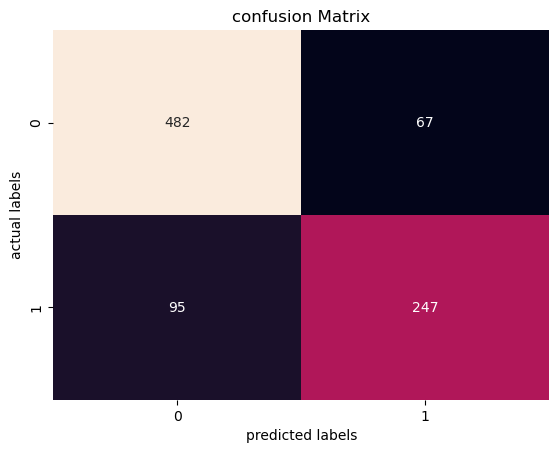

In [85]:
#plotting confusion matrix as a graph 
ax = plt.subplot()
sns.heatmap(confusion_matrix, annot = True , fmt = 'g' , ax=ax , cbar = False);
# Labels, title and ticks
ax.set_xlabel('predicted labels');
ax.set_ylabel('actual labels');
ax.set_title('confusion Matrix');

In [86]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.82      0.82      0.82       891



In [87]:
#To be honest, it doesn’t look good. We can do better. We can try different models for this dataset. But this assignment is about logistic regression
accuracy_score(y,y_pred)

0.8181818181818182

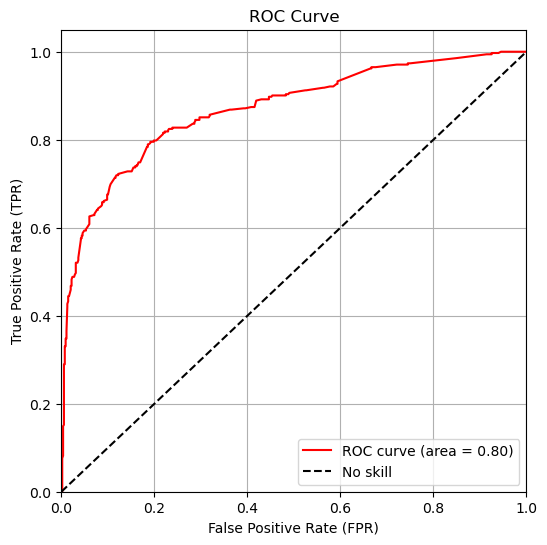

In [88]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y,y_pred)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr,color = 'red', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='No skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Interview questions

# 1. What is the difference between precision and recall?

# Both precision and recall are metrics used to evaluate the performance of a classification model, particularly in situations where there are positive and negative classes. They give us insights into different aspects of a model's performance, so it's important to consider both when evaluating a classifier.
# Precision:

# Focuses on: The proportion of positive predictions that were actually correct.
# Answers: Out of all the things the model classified as positive, how many were truly positive?
# Scenario: Imagine a spam filter classifying emails. High precision means the filter identifies most flagged emails as actual spam and avoids flagging important emails as spam.

# Recall:

# Focuses on: The proportion of actual positive cases that were identified by the model.
# Answers: Out of all the actual positive cases, how many did the model correctly identify?
# Scenario: Going back to the spam filter example, high recall means the filter catches most spam emails, minimizing the number of spam emails that slip through the cracks.
# Here's an analogy to understand the difference:

#Imagine you're a security guard looking for smuggled items in luggage.

# High Precision: You only stop people who are actually carrying smuggled items (avoiding false positives).
# High Recall: You catch most people carrying smuggled items (avoiding false negatives).
# Trade-off between Precision and Recall:

# There's often a trade-off between precision and recall. Focusing too much on one can negatively impact the other. For example, to increase recall (catching more spam), you might flag more innocent emails (lowering precision).

# Choosing the right metric depends on the cost of errors in your specific scenario:

# If a false positive (e.g., flagging a good email as spam) is less costly than a false negative (missing an actual spam email), prioritize precision.
# If a false negative is more critical (e.g., missing a fraudulent transaction), prioritize recall.
# In conclusion:

# Precision tells you how accurate your positive predictions are.
# Recall tells you how good your model is at finding all the positive cases.
# Consider both metrics when evaluating a classification model, and choose the one that aligns best with your specific problem and the cost of different errors.



In [89]:
# 2. What is cross-validation, and why is it important in binary classification?

# Cross-validation is a technique commonly used in machine learning, especially crucial for binary classification tasks. It helps us get a more robust estimate of how well a model will perform on unseen data. Here's how it works:

# Split the data:  We divide your entire dataset containing both features and target variables (0 or 1 in binary classification) into multiple folds (usually k folds).

# Train-Test Loop:

# For each fold (i):
# Mark that fold as the testing data for this iteration.
# Combine the remaining folds into training data.
# Train your binary classification model on the training data.
# Evaluate the model's performance on the testing fold (e.g., using accuracy, precision, recall, etc.).
# Repeat and Aggregate:

# Repeat steps for all k folds.
# After running through all folds, aggregate the evaluation metrics (e.g., average accuracy) across all folds to get a more comprehensive picture of the model's generalizability.
# Importance in Binary Classification:

# In binary classification, we are typically trying to build a model that can accurately distinguish between two classes (often labeled 0 and 1). Here's why cross-validation is vital:

# Prevents Overfitting: Using a single split of data for training and testing can lead to overfitting, where the model performs well on the specific training data it saw but fails to generalize to unseen data. Cross-validation helps by exposing the model to different parts of the data during training, providing a more realistic assessment of performance.
# Reduces Bias: A single random split of the data might not be representative of the entire dataset. Cross-validation uses multiple folds, leading to a less biased estimate of the model's performance on future data.
# Provides a More Reliable Performance Metric: The final evaluation metric (e.g., average accuracy) obtained after cross-validation is a more trustworthy indicator of how well the model will perform on new data compared to a single train-test split.
# By leveraging cross-validation, you gain confidence that your binary classification model isn't just memorizing the training data but can genuinely classify unseen instances. This is essential for real-world applications where the model will encounter new data it hasn't seen before.

# There are different variations of cross-validation techniques, with common choices being k-fold cross-validation (mentioned earlier) and Stratified K-Fold cross-validation (which ensures each fold has a similar class distribution as the original data).